# Med-NLP Capstone Project Modelling

### This notebook winds up EDA and starts exploratory modelling.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the admissions csv
df_adm = pd.read_csv('ADMISSIONS.csv')

## Finalizing EDA:

In [2]:
# Data preparation
# Read in the admissions csv file and create a Pandas DataFrame
df_adm.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [3]:
# Data Exploration
# Understanding the data columns
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [4]:
# This code generates a summary of descriptive statistics for the numerical columns in the df_adm DataFrame
# The summary includes the count, mean, standard deviation, minimum and maximum values, and quartiles for each numerical column
df_adm.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


In [5]:
#Checking total null value in Death time column
df_adm.DEATHTIME.isna().sum()

53122

In [6]:
# Getting total number of deaths

no_deaths = len(df_adm)-df_adm.DEATHTIME.isna().sum()
print('Total Hospital Deaths = ' + str(no_deaths))

Total Hospital Deaths = 5854


In [7]:
# Admission types and their count
df_adm.ADMISSION_TYPE.value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

In [8]:
# This code counts the number of unique values in the DISCHARGE_LOCATION column of the df_adm DataFrame
df_adm.DISCHARGE_LOCATION.value_counts()

HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64

In [9]:
# Getting percentage of patients except 'HOME' categorized. This means those patients are still on treatment.

pct_notokay = ((58975-18962)/58975)*100
print('Percentage of patients not recovered = ' + '%.2f' % pct_notokay + '%')

Percentage of patients not recovered = 67.85%


> __So the scope of this project would benefit around 67.85% of the hospital patients. That's a huge chunk of patients!__

In [10]:
# Converting dates into Datetime

df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [11]:
# Sorting by subject_ID and admission date

df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1


In [12]:
# This code creates two new columns in the df_adm DataFrame. The first new column is called 'NEXT_ADMITTIME' and is filled with the ADMITTIME of the next admission for each patient. 
#This is done by grouping the DataFrame by SUBJECT_ID and using the shift method to shift the ADMITTIME column by one row in the ascending order for each patient. 

df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)

# The second new column is called 'NEXT_ADMISSION_TYPE' and contains the admission type of the next admission for each patient. 
#This is also done by grouping the DataFrame by SUBJECT_ID and using the shift method to shift the ADMISSION_TYPE column by one row in the ascending order for each patient.

df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

# This code returns the modified df_adm DataFrame.
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1,NaT,NaN
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1,NaT,NaN
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1,NaT,NaN
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1,NaT,NaN


In [13]:
# Getting rows where next admission is elective and then replace with naT or nan
# As we want to predict UNPLANNED re-admissions, so we should filter out the ELECTIVE next admissions
rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
df_adm.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1,NaT,NaN
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1,NaT,NaN
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1,NaT,NaN
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1,NaT,NaN


In [14]:
# This code sorts the rows of the df_adm DataFrame in ascending order by the SUBJECT_ID and ADMITTIME columns
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

# This code fills missing values in the NEXT_ADMITTIME and NEXT_ADMISSION_TYPE columns of the df_adm DataFrame with the value from the next row within each group of SUBJECT_ID
df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

# The updated df_adm DataFrame is returned
df_adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58972,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,JEWISH,MARRIED,WHITE,2181-01-26 23:35:00,2181-01-27 04:18:00,FEVER,0,1,NaT,NaN
58972,58973,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,DIVERTICULITIS/SDA,0,1,NaT,NaN
58973,58974,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaT,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,CATHOLIC,WIDOWED,WHITE,2144-07-25 13:40:00,2144-07-25 18:50:00,RETROPERITONEAL HEMORRHAGE,0,1,NaT,NaN
58974,58975,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,ABDOMINAL AORTIC ANEURYSM/SDA,0,1,NaT,NaN


In [15]:
# This code calculates the number of days between the current admission and the next admission for each patient, and stores the result in the DAYS_NEXT_ADMIT column of the df_adm DataFrame
df_adm['DAYS_NEXT_ADMIT']=  (df_adm.NEXT_ADMITTIME - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)

In [16]:
#Calculating Non-Null values in Next admission day column
df_adm['DAYS_NEXT_ADMIT'].notna().sum()

11399

In [17]:
# This code creates a new DataFrame df2 that only includes rows from the original df_adm DataFrame where the value of the ADMISSION_TYPE column is equal to 'EMERGENCY'
df2 = df_adm[df_adm['ADMISSION_TYPE'] == 'EMERGENCY']

# This code counts the number of non-null values in the DAYS_NEXT_ADMIT column of the df2 DataFrame, which provides a count of the number of emergency admissions where the patient had a subsequent admission.
df2['DAYS_NEXT_ADMIT'].notna().sum()

9545

In [18]:
# Getting percentage of unplanned readmissions of the total readmissions

pct_readmissions = (9545/11399)*100
print('Out of all the readmitted patients, a staggering ' + '%.2f' % pct_readmissions + '% were not planned!')

Out of all the readmitted patients, a staggering 83.74% were not planned!


> __So we have 11,399 hospital readmissions! Out of which 9,545 were readmitted without any prior planning! Out of all the readmitted patients, a staggering 83.74% were not planned!__

## Exploratory Modelling:

In [19]:
# Reading NOTEEVENTS csv

df_notes = pd.read_csv("NOTEEVENTS.csv")

C:\Users\Harshit Dave\AppData\Local\Temp\ipykernel_2016\2441151186.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_notes = pd.read_csv("NOTEEVENTS.csv")


In [20]:
#Displying Noteevents data
df_notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [21]:
df_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [22]:
# Selecting rows with discharge summaries from the original notes DataFrame
df_notes_dis_sum = df_notes.loc[df_notes.CATEGORY == 'Discharge summary']

In [23]:
# Selecting the last discharge summary for each admission and checking for duplicates
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'
df_notes_dis_sum_last

,SUBJECT_ID,HADM_ID,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,3,145834.0,44005,2101-10-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...
1,4,185777.0,4788,2191-03-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...
2,6,107064.0,20825,2175-06-15,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...
3,9,150750.0,57115,2149-11-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi..."
4,10,184167.0,17390,2103-07-06,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...
...,...,...,...,...,...,...,...,...,...,...,...
52721,99985,176670.0,51770,2181-02-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2181-1-27**] ...
52722,99991,151118.0,9682,2185-01-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2184-12-24**] ...
52723,99992,197084.0,41993,2144-07-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2144-7-25**] ...
52724,99995,137810.0,42710,2147-02-11,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-2-8**] D...


In [24]:
# Merging admission and notes df
# We are merging the admissions data with the discharge summary notes data based on SUBJECT_ID and HADM_ID, using a left join
df_adm_notes = pd.merge(df_adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT','NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
assert len(df_adm) == len(df_adm_notes), 'Number of rows increased'
df_adm_notes

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NaT,NEWBORN,NaT,NaN
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2101-10-20**] Discharg...
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2191-3-16**] Discharge...
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NaT,NEWBORN,NaT,NaN
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...
...,...,...,...,...,...,...,...,...,...
58971,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2181-1-27**] ...
58972,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2184-12-24**] ...
58973,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2144-7-25**] ...
58974,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2147-2-8**] D...


In [25]:
# Calculate the percentage of missing values in the 'TEXT' column of the 'df_adm_notes' DataFrame
m_adm = (df_adm_notes.TEXT.isnull().sum() / len(df_adm_notes)) * 100

# Print the percentage of missing values in a human-readable format with two decimal places
print('Percentage of admissions missing text = ' + '%.2f' % m_adm + '%')


Percentage of admissions missing text = 10.60%


In [26]:
# Figuring out reason for the missing admissions
# This code calculates the percentage of missing values in the 'TEXT' column for each 'ADMISSION_TYPE' group in the 'df_adm_notes' DataFrame.
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

> __Most likely, these missing NEWBORN admissions have their discharge summary stored outside of the MIMIC dataset.__ Hence dropping them.

In [27]:
# Removing NEWBORN cases from our data

df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()
df_adm_notes_clean

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2101-10-20**] Discharg...
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2191-3-16**] Discharge...
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,NaN,NaT,EMERGENCY,2149-11-14 10:15:00,"Name: [**Known lastname 10050**], [**Known fi..."
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2178-4-16**] ...
...,...,...,...,...,...,...,...,...,...
58971,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2181-1-27**] ...
58972,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2184-12-24**] ...
58973,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2144-7-25**] ...
58974,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2147-2-8**] D...


In [28]:
# Preparing labels if readmitted < 30 days
# This code creates a binary classification label for each admission in the 'df_adm_notes_clean' DataFrame, based on whether the patient was readmitted within 30 days or not.

# Create a new column called 'OUTPUT_LABEL' and set its value to 1 if the 'DAYS_NEXT_ADMIT' column is less than 30, and 0 otherwise.
df_adm_notes_clean['OUTPUT_LABEL'] = (df_adm_notes_clean.DAYS_NEXT_ADMIT < 30).astype('int')

# Return the updated 'df_adm_notes_clean' DataFrame with the new 'OUTPUT_LABEL' column.
df_adm_notes_clean


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT,OUTPUT_LABEL
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2191-3-16**] Discharge...,0
4,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2175-5-30**] Dischar...,0
7,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,NaN,NaT,EMERGENCY,2149-11-14 10:15:00,"Name: [**Known lastname 10050**], [**Known fi...",0
9,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2178-4-16**] ...,0
...,...,...,...,...,...,...,...,...,...,...
58971,99985,176670,2181-01-27 02:47:00,2181-02-12 17:05:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2181-1-27**] ...,0
58972,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2184-12-24**] ...,0
58973,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2144-7-25**] ...,0
58974,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2147-2-8**] D...,0


In [29]:
print('Number of positive samples:', (df_adm_notes_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_adm_notes_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_notes_clean))

Number of positive samples: 3004
Number of negative samples: 48109
Total samples: 51113


In [30]:
# creating training and testing datasets
# This code splits the 'df_adm_notes_clean' DataFrame into training, validation, and test sets, and shuffles the data for each set.

# Shuffle the 'df_adm_notes_clean' DataFrame using the 'sample' method and a random seed of 42.
df_adm_notes_clean = df_adm_notes_clean.sample(n=len(df_adm_notes_clean), random_state=42)

# Reset the index of the shuffled DataFrame to ensure that it starts from 0 and has no missing values.
df_adm_notes_clean = df_adm_notes_clean.reset_index(drop=True)

# Sample 30% of the data from the shuffled DataFrame to use as validation and test data.
df_valid_test = df_adm_notes_clean.sample(frac=0.30, random_state=42)

# Sample 50% of the validation and test data to use as test data.
df_test = df_valid_test.sample(frac=0.5, random_state=42)

# Remove the test data from the validation and test data to create the final validation data.
df_valid = df_valid_test.drop(df_test.index)

# Use the remaining data as training data by removing the validation and test data from the original DataFrame.
df_train_all = df_adm_notes_clean.drop(df_valid_test.index)


In [31]:
#Train data Info
df_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35779 entries, 0 to 51112
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SUBJECT_ID       35779 non-null  int64         
 1   HADM_ID          35779 non-null  int64         
 2   ADMITTIME        35779 non-null  datetime64[ns]
 3   DISCHTIME        35779 non-null  datetime64[ns]
 4   DAYS_NEXT_ADMIT  7802 non-null   float64       
 5   NEXT_ADMITTIME   7802 non-null   datetime64[ns]
 6   ADMISSION_TYPE   35779 non-null  object        
 7   DEATHTIME        3965 non-null   datetime64[ns]
 8   TEXT             34341 non-null  object        
 9   OUTPUT_LABEL     35779 non-null  int32         
dtypes: datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 2.9+ MB


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 25234 to 11385
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SUBJECT_ID       7667 non-null   int64         
 1   HADM_ID          7667 non-null   int64         
 2   ADMITTIME        7667 non-null   datetime64[ns]
 3   DISCHTIME        7667 non-null   datetime64[ns]
 4   DAYS_NEXT_ADMIT  1659 non-null   float64       
 5   NEXT_ADMITTIME   1659 non-null   datetime64[ns]
 6   ADMISSION_TYPE   7667 non-null   object        
 7   DEATHTIME        930 non-null    datetime64[ns]
 8   TEXT             7362 non-null   object        
 9   OUTPUT_LABEL     7667 non-null   int32         
dtypes: datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 628.9+ KB


In [33]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 9061 to 41723
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SUBJECT_ID       7667 non-null   int64         
 1   HADM_ID          7667 non-null   int64         
 2   ADMITTIME        7667 non-null   datetime64[ns]
 3   DISCHTIME        7667 non-null   datetime64[ns]
 4   DAYS_NEXT_ADMIT  1708 non-null   float64       
 5   NEXT_ADMITTIME   1708 non-null   datetime64[ns]
 6   ADMISSION_TYPE   7667 non-null   object        
 7   DEATHTIME        897 non-null    datetime64[ns]
 8   TEXT             7380 non-null   object        
 9   OUTPUT_LABEL     7667 non-null   int32         
dtypes: datetime64[ns](4), float64(1), int32(1), int64(2), object(2)
memory usage: 628.9+ KB


## Data Preprocessing:

In [34]:
# This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')

# This code defines a function that preprocesses the text data in a DataFrame.

def preprocess_text(df):
    # Replace any missing values in the 'TEXT' column with an empty string.
    df.TEXT = df.TEXT.fillna(' ')
    
    # Replace any newline or carriage return characters in the 'TEXT' column with a space.
    df.TEXT = df.TEXT.str.replace('\n',' ')
    df.TEXT = df.TEXT.str.replace('\r',' ')
    
    # Return the updated DataFrame with the preprocessed 'TEXT' column.
    return df

In [35]:
# preprocess the text to deal with known issues

df_train = preprocess_text(df_train_all)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)

In [36]:
# building a tokenizer

# This code defines a tokenizer function that tokenizes text by replacing punctuation and numbers with spaces and lowercasing all words.

# Import the necessary libraries.
import nltk
from nltk import word_tokenize
import string

# Define a function called 'tokenizer' that takes in a string of text as an argument.
def tokenizer(text):
    
    # Create a list of punctuation and numbers to replace.
    punc_list = string.punctuation+'0123456789'
    
    # Create a translation table to replace the punctuation and numbers with spaces.
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    
    # Lowercase all words in the text and replace punctuation and numbers with spaces using the translation table.
    text = text.lower().translate(t)
    
    # Tokenize the text using the NLTK 'word_tokenize' function and return the result.
    tokens = word_tokenize(text)
    return tokens

# Test the 'tokenizer' function by passing in a sample text string.
tokenizer('Today is a good day. 03/27/2023 sentence has three stars***')

['today', 'is', 'a', 'good', 'day', 'sentence', 'has', 'three', 'stars']

In [37]:
# building a vectorizer

# Import the necessary libraries.
from sklearn.feature_extraction.text import CountVectorizer

# Define a sample_text list.
sample_text = ['Data science is about the data', 'The science is amazing', 'Predictive modeling is part of data science']

# Instantiate a CountVectorizer object called 'vect' with a tokenizer argument set to the 'tokenizer' function defined earlier in the code.
vect = CountVectorizer(tokenizer = tokenizer)

# Call the 'fit' method on the 'vect' object, which trains the vectorizer on the sample_text data.
vect.fit(sample_text)

# Use the fitted vectorizer to transform the 'sample_text' data into a sparse matrix called 'X', where each row represents a document in the corpus and each column represents a token in the vocabulary.
X = vect.transform(sample_text)

# Display the resulting sparse matrix.
X

C:\Users\Harshit Dave\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [38]:
# converting it to an array to visualize the Vector

X.toarray()

array([[1, 0, 2, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int64)

In [39]:
# getting the column names

vect.get_feature_names()

C:\Users\Harshit Dave\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['about',
 'amazing',
 'data',
 'is',
 'modeling',
 'of',
 'part',
 'predictive',
 'science',
 'the']

In [40]:
# vectorizer on clinical data

# We define a custom list of stop words that we want to remove from the text data. These are common words
# that don't add much meaning to the text and could cause noise in the model.
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']

# Then, we create an instance of the CountVectorizer class with the following parameters:
# - max_features: maximum number of features to be used, set to 3000
# - tokenizer: custom tokenizer function that removes punctuation and numbers and lowercase the words
# - stop_words: custom list of stop words defined above
vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer, 
                       stop_words = my_stop_words)

# Finally, we fit the CountVectorizer object on the text data in the TEXT column of the training dataset
# to create a vocabulary of features that will be used for the model. This step could take some time to run,
# especially if the dataset is large.

vect.fit(df_train.TEXT.values)

CountVectorizer(max_features=3000,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                tokenizer=<function tokenizer at 0x0000024A8198EB80>)

           negative  positive   total
mg           446075     39045  485120
no           390677     25902  416579
tablet       353794     30760  384554
po           270348     24694  295042
blood        256392     18433  274825
discharge    229258     15777  245035
daily        218718     19642  238360
hospital     217480     16888  234368
sig          212145     19417  231562
day          203528     17116  220644


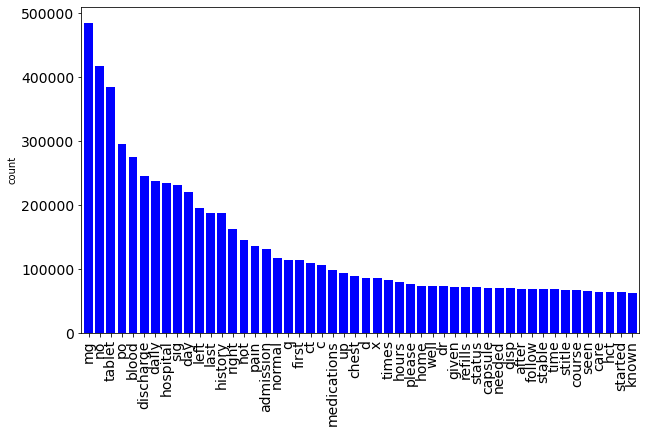

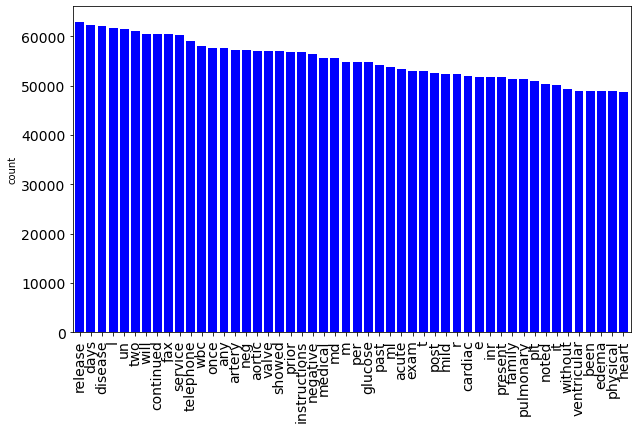

In [41]:
# This code block performs text analysis on a dataset.

# Create two document matrices for negative and positive subsets of the dataset using `vect.transform` method.
neg_doc_matrix = vect.transform(df_train[df_train.OUTPUT_LABEL == 0].TEXT)
pos_doc_matrix = vect.transform(df_train[df_train.OUTPUT_LABEL == 1].TEXT)

# Sum the document matrices along their columns to obtain term frequencies for each word.
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)

# Convert the term frequencies to arrays and create a DataFrame to store the negative and positive term frequencies for each word.
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg, pos], columns=vect.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']

# Add a new column to the DataFrame to store the total frequency for each word and sort the DataFrame in descending order based on the total frequency.
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False, inplace=True)

# Print the top 10 most frequently occurring words in the dataset to the console.
print(term_freq_df.iloc[:10])

# Create a pandas Series object from the total frequency values and plot the top 50 and 50-100 most frequently occurring words in the dataset as bar charts.
d = pd.Series(term_freq_df.total, index=term_freq_df.index).sort_values(ascending=False)
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90, color='b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90, color='b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()


In [42]:
# Transform notes into the vector format
# Convert the text data in the `TEXT` column of 'df_train' into a document-term matrix using the 'vect.transform' method.
X_train_tf = vect.transform(df_train.TEXT.values)

# Convert the text data in the `TEXT` column of 'df_valid' into a document-term matrix using the 'vect.transform' method.
X_valid_tf = vect.transform(df_valid.TEXT.values)


In [43]:
# Getting labels

y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

## Building Model:

In [44]:
# logistic regression

# This code block trains a logistic regression model on the 'X_train_tf' document-term matrix and the corresponding 'y_train' labels.

# Import the 'LogisticRegression' class from scikit-learn.
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression object with some hyperparameters specified: 'C = 0.0001', 'penalty = 'l2'', and 'random_state = 42'.
clf = LogisticRegression(C=0.0001, penalty='l2', random_state=42)

# Train the logistic regression model on the training data using the 'fit' method of the 'LogisticRegression' object.
clf.fit(X_train_tf, y_train)


LogisticRegression(C=0.0001, random_state=42)

In [45]:
# This code block uses the trained logistic regression model to make predictions on both the training data and the validation data.

# Set 'model' equal to 'clf' to use the trained logistic regression model for making predictions.
model = clf

# Use the 'predict_proba' method to obtain the predicted probabilities of the positive class (class 1) for each document in the 'X_train_tf' document-term matrix.
y_train_preds = model.predict_proba(X_train_tf)[:, 1]

# Use the 'predict_proba' method to obtain the predicted probabilities of the positive class (class 1) for each document in the 'X_valid_tf' document-term matrix.
y_valid_preds = model.predict_proba(X_valid_tf)[:, 1]


In [46]:
# Print out the first 10 actual labels for the training data.
print(y_train[:10].values)

# Print out the corresponding predicted probabilities of the positive class for the first 10 documents in the training data.
print(y_train_preds[:10])

[0 0 0 0 0 0 0 0 0 0]
[0.04991205 0.06335564 0.03911071 0.04723683 0.02163854 0.05001915
 0.04957377 0.03181732 0.05394713 0.01921275]


In [47]:
# This code block contains several functions for evaluating binary classification models.

# Function to calculate accuracy with probability threshold at thresh
def calc_accuracy(y_actual, y_pred, thresh):
    return (sum((y_pred > thresh) & (y_actual == 1)) + sum((y_pred < thresh) & (y_actual == 0))) / len(y_actual)

# Function to calculate recall
def calc_recall(y_actual, y_pred, thresh):
    return sum((y_pred > thresh) & (y_actual == 1)) / sum(y_actual)

# Function to calculate precision
def calc_precision(y_actual, y_pred, thresh):
    return sum((y_pred > thresh) & (y_actual == 1)) / sum(y_pred > thresh)

# Function to calculate specificity
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

# Function to calculate prevalence
def calc_prevalence(y_actual):
    return sum((y_actual == 1)) / len(y_actual)


Train AUC:0.748
Valid AUC:0.719
Train accuracy:0.942
Valid accuracy:0.943
Train recall:0.003
Valid recall:0.002
Train precision:0.500
Valid precision:0.500
Train specificity:1.000
Valid specificity:1.000
Train prevalence:0.058
Valid prevalence:0.057


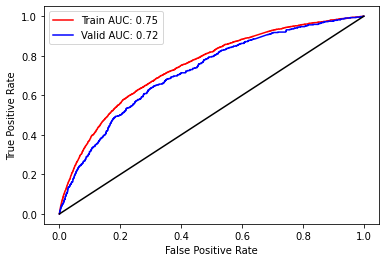

In [48]:
# In this code cell, we're evaluating the performance of our binary classification model using several metrics, including AUC-ROC, accuracy, recall, precision, specificity, and prevalence. 
# Importing necessary libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Computing ROC curve and AUC score for the training and validation sets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds) # Compute the false positive rate (fpr), true positive rate (tpr), and decision thresholds for the training set
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds) # Compute the fpr, tpr, and decision thresholds for the validation set

# Setting a decision threshold of 0.5 and computing AUC score for both sets
thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds) # Compute the AUC score for the training set
auc_valid = roc_auc_score(y_valid, y_valid_preds) # Compute the AUC score for the validation set

# Printing the AUC score, accuracy, recall, precision, specificity, and prevalence for both sets
print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh)) # Compute the accuracy for the training set
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh)) # Compute the accuracy for the validation set

print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh)) # Compute the recall for the training set
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh)) # Compute the recall for the validation set

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh)) # Compute the precision for the training set
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh)) # Compute the precision for the validation set

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh)) # Compute the specificity for the training set
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh)) # Compute the specificity for the validation set

print('Train prevalence:%.3f'%calc_prevalence(y_train)) # Compute the prevalence for the training set
print('Valid prevalence:%.3f'%calc_prevalence(y_valid)) # Compute the prevalence for the validation set

# Plotting the ROC curves for both sets to visualize the performance of the model
plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train) # Plot the ROC curve for the training set
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid) # Plot the ROC curve for the validation set
plt.plot([0,1],[0,1],'-k') # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [49]:
# Importing the pickle module for saving the model to disk
import pickle

# Saving the logistic regression model to disk using pickle
filename = 'log_reg_model.pkl' # Specify the name and path of the file to save the model to
pickle.dump(model, open(filename, 'wb')) # Save the model to the file using binary mode ('wb')

In [50]:
# load the model from disk
loaded_model = pickle.load(open( 'log_reg_model.pkl', 'rb'))

In [51]:
# Using the saved logistic regression model to predict on the training data
y_train_preds2 = loaded_model.predict(X_train_tf)

In [52]:
# Generating a classification report for the predicted labels and true labels of the training data
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_preds2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     33687
           1       0.50      0.00      0.01      2092

    accuracy                           0.94     35779
   macro avg       0.72      0.50      0.49     35779
weighted avg       0.92      0.94      0.91     35779



In [53]:
#Train DataFrame
df_train

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT,OUTPUT_LABEL
0,21284,126923,2168-05-03 07:15:00,2168-05-10 14:50:00,999.551389,2171-02-04 04:04:00,ELECTIVE,NaT,Admission Date: [**2168-5-3**] Discharg...,0
2,4308,109424,2141-04-04 18:38:00,2141-04-06 16:52:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2141-4-4**] D...,0
3,82935,157739,2183-01-17 20:44:00,2183-01-19 11:19:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2183-1-17**] ...,0
5,3365,100103,2179-12-13 07:15:00,2179-12-23 13:15:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2179-12-13**] Discha...,0
8,64652,162378,2123-03-03 05:06:00,2123-03-10 17:20:00,NaN,NaT,EMERGENCY,2123-03-10 17:20:00,Admission Date: [**2123-3-3**] D...,0
...,...,...,...,...,...,...,...,...,...,...
51107,6492,179219,2143-04-13 20:05:00,2143-04-29 04:55:00,NaN,NaT,EMERGENCY,2143-04-29 04:55:00,Admission Date: [**2143-4-13**] ...,0
51108,11618,197247,2161-04-23 15:24:00,2161-05-01 17:45:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2161-4-23**] ...,0
51110,59281,141901,2147-03-03 19:39:00,2147-03-13 17:20:00,NaN,NaT,EMERGENCY,NaT,Admission Date: [**2147-3-3**] D...,0
51111,841,140374,2153-12-02 15:24:00,2153-12-07 17:05:00,NaN,NaT,ELECTIVE,NaT,Admission Date: [**2153-12-2**] ...,0


### Based on the classification report, the model performs well in predicting class 0 with high precision, but it has a significant problem in predicting class 1. We plan to improve the model to avoid skewed prediction and achieve good accuracy for both classes.